In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
iris = load_iris()
X = iris.data
y = iris.target

In [9]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42,stratify=y)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred = knn.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f"테스트 데이터 정확도: {accuracy:.2f}")

테스트 데이터 정확도: 0.93


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


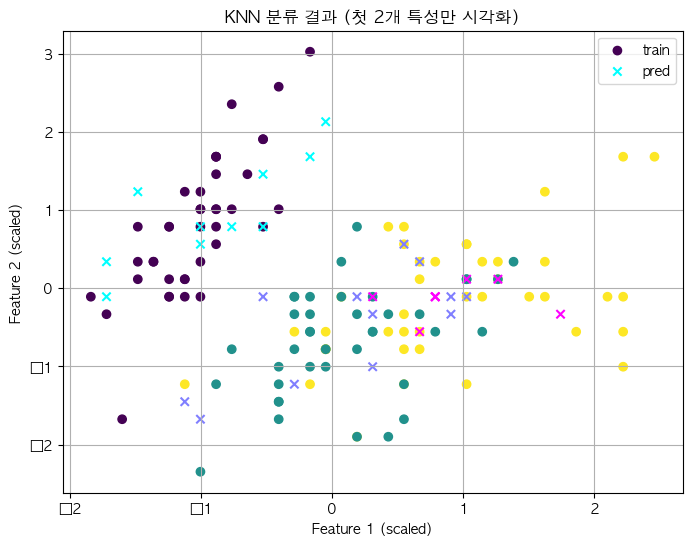

In [29]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='cool', marker='x', label='pred')
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.title("KNN 분류 결과 (첫 2개 특성만 시각화)")
plt.legend()
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


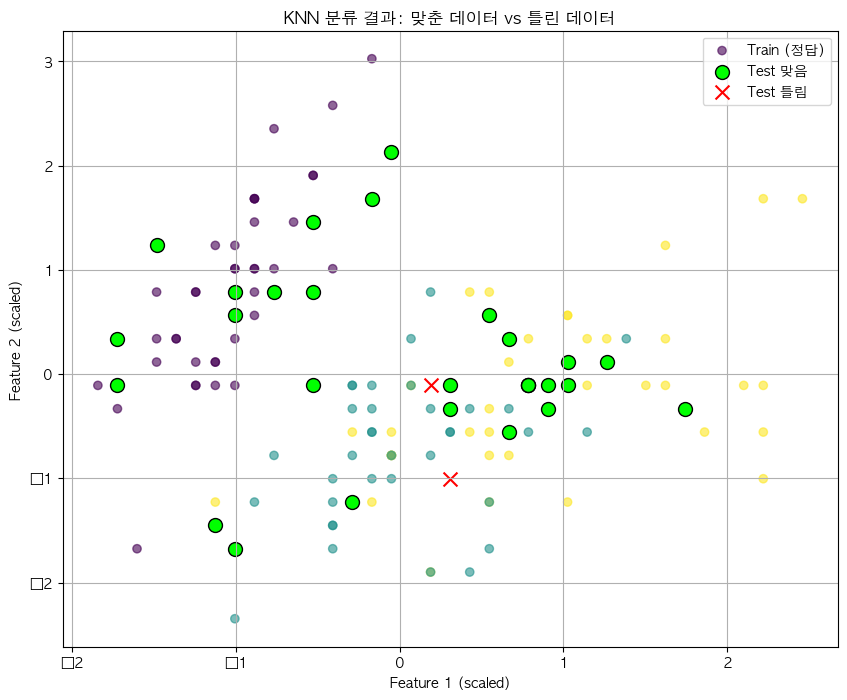

In [31]:
# 맞춘 샘플(True), 틀린 샘플(False) 구분
correct = (y_test == y_pred)  # 맞으면 True, 틀리면 False

# 시각화 시작
plt.figure(figsize=(10, 8))

# 1. 훈련 데이터 그리기
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Train (정답)', alpha=0.6)

# 2. 테스트 데이터 맞춘 것
plt.scatter(
    X_test[correct, 0], X_test[correct, 1], 
    c='lime', marker='o', edgecolor='k', s=100, label='Test 맞음'
)

# 3. 테스트 데이터 틀린 것
plt.scatter(
    X_test[~correct, 0], X_test[~correct, 1], 
    c='red', marker='x', s=100, label='Test 틀림'
)

# 축 이름과 제목 추가
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title('KNN 분류 결과: 맞춘 데이터 vs 틀린 데이터')

plt.legend()
plt.grid(True)
plt.show()